<a href="https://colab.research.google.com/github/semorrall/colab_uploads/blob/main/Copy_of_Copy_of_biol300_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [496]:
# make sure to include your imports here!
import pandas as pd
import numpy as np
import seaborn as sns

# Problem 1. Extracting information from a data frame (15 points)

Adapted from Chapter 9 of 'Computing Skills for Biologists' text.

We will be looking at data from Fauchald et al. (2017), in which they tracked the population size of various herds of caribou in North America over time, and correlated population cycling with the amount of vegetation and sea-ice cover. For now, we will just consider the population size alone. 

Note: Since this data is publicly hosted by the authors of the textbook, we can just link to this data as I show below (no need to mount your Google drive!). In general, I'm not hosting data publicly for this course unless I have explicit permission from the researchers who collected the data. But in this case, the authors of 'Computing Skills for Biologists' have already done that for us, so we are good to use these public links!

In [459]:
path = "https://raw.githubusercontent.com/CSB-book/CSB/master/data_wrangling/data/FauchaldEtAl2017/pop_size.csv"
df = pd.read_csv(path, delimiter="\t")
df.head()

,Herd,Year,Pop_Size
0,WAH,1970,242000
1,WAH,1976,75000
2,WAH,1978,107000
3,WAH,1980,138000
4,WAH,1982,217863


A. Take a look at the structure of the data, and explain why the data are in fact tidy. That is, what is the 'observation' that constitutes each row?

B. Let's first get a sense of which years this study was conducted. Report the minimum and maximum value for `Year` in this data frame.

C. Let's also get a sense of how many herds of caribou they looked at. Report the number of differnet herd names that appear in this data frame. First approach this by looping through the values of `df["Herd"]` and keeping track of any new entries. Then as a shortcut, try using `df["Herd"].unique()` to make sure you ge tthe same answer.

D. List the three years with the largest population size for the herd called `WAH`.

E. For each herd, compute the average population size. Which herd is largest on average? Which herd is smallest on average? 

F. For each herd, we may want to get a sense of the population size by normalizing to the average for that herd. Add a new column called `Relative_Pop` that should be 1 when the population in that year is exactly as large as the mean population, a value of 2 if the population is twice the mean, 0.5 if it's half of the mean, etc.). To add a new column to a data frame, you can call somthing like:

> `df["new column names"] = values_of_intererst`



a) The data is tidy because:

 - Each variable forms a callumn(ie. heard, year, pop size). 
 - Each observation forms a row(ie. each instance of the population of a heard being recordeded)
 - and each cell is a single measurement

In [460]:
def time_frame(data = df):
  """finds the first and last year of a study
  param df: the data frame that is be observed
  
  return: the time frame the study occurred over as a string output"""
  first_year = data["Year"].max()
  last_year = data["Year"].min()

  return f'This study began in {first_year} and ended in {last_year}.'
time_frame()

'This study began in 2014 and ended in 1970.'

In [461]:
def unique_count_a(data = df, collumn = "Herd"):
  """counts the number of unique occrences of an entry type in a CSV using
  the "set" function
   
  param data: the dataframe being observed (defaults to df)
  param collumn: the title of the collum being checked for unique occurances

  return: a string describing the number of unique occurances
  """
  count = len(set(df[collumn]))

  return f'There are {count} unique {collumn.lower()}s being observed in this study'

In [462]:
def unique_count_b(data = df, collumn = "Herd"):
  """counts the number of unique occrences of an entry type in a CSV using
  a for loop
   
  param data: the dataframe being observed (defaults to df)
  param item: the title of the collum being checked for unique occurances

  return: a string describing the number of unique occurances
  """
  new = []
  for i in data[collumn]:
    if i not in new:
      new.append(i)
  count = len(new)

  return f'There are {count} unique {collumn.lower()}s being observed in this study'

In [463]:
#with a set
unique_count_a()


'There are 11 unique herds being observed in this study'

In [464]:
#with a for loop
unique_count_b()


'There are 11 unique herds being observed in this study'

In [465]:
#shortcut to check the accuracy of my fuctions
len(df["Herd"].unique())

11

In [466]:
"""I got tired of writing functions but here are the entries with the largest 
polulation size for the herd WAH"""

top_3 = df[df["Herd"] == "WAH"].nlargest(3, "Pop_Size", keep = 'all')
top_3

,Herd,Year,Pop_Size
11,WAH,2003,490000
8,WAH,1993,478822
9,WAH,1996,463000


In [467]:
"""And here are the years that corrispond to the entries from the previous 
code block"""

top_3["Year"]

11    2003
8     1993
9     1996
Name: Year, dtype: int64

In [468]:
def average_herd_sizes(df = df):
   """creates a dataframe of the name of each heard and each heard's 
   average size
   
  param df: the dataframe being observed with information about each heard
  
  return: a dataframe of average heard sizes
  """
  #makes a list of heard names but with only on occurance of each name
  herds = df["Herd"].unique()

  #iteratied through each heard name and calulated it's mean pop size
  means = []
  for i in herds:
      mean = df[df["Herd"] == i]["Pop_Size"].mean()
      means.append(mean)

  #creates a dataframe of the herds and their average populations
  data = {"Herd": herds , "Average_Pops": means}
  herds_and_means = pd.DataFrame(data)

  return herds_and_means
average_herd_sizes()

,Herd,Average_Pops
0,WAH,308895.687500
1,CAH,27504.818182
2,TCH,29155.545455
3,PCH,141853.846154
4,CBH,8121.875000
5,BLW,57650.500000
6,BAT,212715.833333
7,QAM,209851.222222
8,LRH,284571.428571
9,GRH,289731.000000


In [469]:
#finds the heard with the largest average herd size
largest_mean = average_herd_sizes().nlargest(1, "Average_Pops", keep = 'all')

largest_mean

,Herd,Average_Pops
0,WAH,308895.6875


In [470]:
#finds the heard with the smallest average heard size
smallest_mean = average_herd_sizes().nsmallest(1, "Average_Pops", keep = 'all')

smallest_mean

,Herd,Average_Pops
4,CBH,8121.875


In [471]:
def relative_pops(df = df):
  """creates a dataframe of each time the heard was recorded and 
  the size of the heards population relative to the other times
  it was recorded
    
    param df: the dataframe being observed with information about each heard
    
    return: the existing data frame with a new collomn added with the 
    relative population size in it
    """
  #holds a list of all of the relative population sizes
  rels = []

  '''Itterates through each row of the data and compaires the listed population
  size with the average populaiton size for that herd. The heard's average 
  population size is found by using the heard name to look for the 
  recorded population sizes for that heard'''
  for index, row in df.iterrows():
    pop = row["Pop_Size"]

    avg = df[df["Herd"] == row["Herd"]]["Pop_Size"].mean()
    rels.append(round(pop/avg , 4))
  
  df["Relative_Pop"] = rels
  return df

relative_pops()


,Herd,Year,Pop_Size,Relative_Pop
0,WAH,1970,242000,0.7834
1,WAH,1976,75000,0.2428
2,WAH,1978,107000,0.3464
3,WAH,1980,138000,0.4468
4,WAH,1982,217863,0.7053
...,...,...,...,...
109,BEV,1982,164338,0.9157
110,BEV,1984,263691,1.4693
111,BEV,1988,189561,1.0562
112,BEV,1994,276000,1.5378


## Problem 2. Making new data frames from exisiting data (20 points)

Adapted from Exercise 6.6.2 from 'Computing Skills for Biologists' text.

Fox et al. (2016) studied the effects on the outcome of papers of the genders
of the handling editors and reviewers. For the study, they compiled a database
including all the submissions to the journal Functional Ecology from 2004 to
2014 . Their data are reported in the link below. Besides the effects
of gender and bias in journals, the data can be used to investigate whether
manuscripts having more reviewers are more likely to be rejected.

A. Import the data using pandas, take a look at the structure of the data, and explain why its tidy. 

In [472]:
path = 'https://raw.githubusercontent.com/CSB-book/CSB/master/scientific/data/Fox2015_data.csv'
df = pd.read_csv(path)
df.head()

,MsID,Year,HandlingEditorSex,ReviewerSex,ReviewerRegion,ReviewerInvited,ReviewerAgreed,ReviewerScore,FinalDecision
0,1,2004,m,m,Oceania,1,1,1,1
1,1,2004,m,m,NorthAmerica,1,1,0,1
2,2,2004,m,m,NorthAmerica,1,1,2,1
3,2,2004,m,m,0,1,1,2,1
4,3,2004,m,m,Europe,1,1,2,0


a) The data is tidy because:

 - Each variable forms a callumn(ie. MsID, year, pop HandlingEditorSex, ...). 
 - Each observation forms a row(ie. each time an article being submitted for review)
 - and each cell is a single measurement

 [This data is stored on a reviewer basis not a manuscript basis.]

B. For each manuscript (i.e. unique MsID), count the number of reviewers there were (where ReviewerAgreed equals `1`). Save this information as a new data frame, with columns `MsID` and `NumberReviewers`, as well as the corresponding `FinalDecision` column. This new data frame contains information on a manuscript basis, rather than a reviewer basis. This will be helpful as we are trying to assess how number of reviewers relates to the rate of rejection.

As a tip, below I show how you can make a new data frame by specifiying the column names and then appending a row of data to the otherwise empty dataframe.

In [526]:
def per_manuscript(data = df):
  """Creates a dataframe of with each manuscript occuring once. Each manuscript
  is listed with the number of times it was reviewed, and the finial descision
  on if it was accepted (0) or regected(1).
      
  param df: the dataframe being observed with information about the manuscrpts
      
  return: a new data frame the manuscript ID, the number of times it was 
  reviewed, and the finial descision on accepting or regecting it
  """

  '''makes a list of all of the unique manuscript IDs that reviewers
   agreeded to review'''
  scripts = data[data["ReviewerAgreed"] == 1]["MsID"].unique()

  NumberReviewers = []
  FinalDecisions = []

  #itterates through the unique manuscript IDs
  for i in scripts:

    '''makes a list of every time that manuscript was reviewed and appends the 
    number of times this happens to a list "NumberReviewers" '''
    all_reviews = data[(data["MsID"] == i) & (data["ReviewerAgreed"] == 1)]
    NumberReviewers.append(len(all_reviews))

    #takes the dscision from the first time the MsID occurs
    descision = data[data["MsID"] == i]["FinalDecision"].iloc[0]
    FinalDecisions.append(descision)


  new_df = pd.DataFrame({"MsID" : scripts ,
                         "NumberReviewers" : NumberReviewers ,
                         "FinalDecision" : FinalDecisions})
  return new_df
per_manuscript()

#Should I remove articles where there were 0 reveiwers o??

,MsID,NumberReviewers,FinalDecision
0,1,2,1
1,2,2,1
2,3,2,0
3,4,2,1
4,5,2,1
...,...,...,...
3840,6715,2,1
3841,6716,2,1
3842,6718,2,1
3843,6719,2,1


In [493]:
# specify the column names we wish our dataframe to have
column_names = ["FirstName", "LastName", "Department"]

# instantiate data frame with those column name 
df_test = pd.DataFrame(columns = column_names)

# define a new row of data, encoded as a dictionary
new_row = {"FirstName": "Suzannah", "LastName": "Beeler", "Department": "QBE"}

# add data row to the data frame and take a look at it
df_test = df_test.append(new_row, ignore_index = True)
df_test

,FirstName,LastName,Department
0,Suzannah,Beeler,QBE


C. With this data frame from part (B), we can now assess if/how the rate of rejection changes with the number of reviewers. The column `FinalDecision` contains `1` for rejection, and `0` for acceptance. Compile a table measuring the probability of rejection given the number of reviewers, including information about how many manuscripts had a given number of reviewers. Save this information in a final data frame, with columns `NumberReviewers` and `NumberManuscripts` and `RejectionRate`.

In [528]:
def regect_rates(df = df):
  """Creates a dataframe of with each number of reviewers occuring once. 
  Each number of reviewers is listed with the nubmer of times this occured and
  thier average regection rate.

  param df: the dataframe being observed with information about the manuscrpts
      
  return: a final data frame with the number of reviewers, the number of times
  this occured, and the average regection rate with this number of reviewers
  """
  new_df = per_manuscript(df)

  #orders the number of unique reviewer counts in accending order
  NumberReviewers = sorted(new_df["NumberReviewers"].unique())

  NumberManuscripts = []
  RejectionRate = []

  '''iterates through each number of reviewers to find the number of times it 
  occurred and the perportion of these occurances that are regections'''
  for i in NumberReviewers:

    all_scripts = new_df[new_df["NumberReviewers"] == i]
    NumberManuscripts.append(len(all_scripts))

    regected = all_scripts[new_df["FinalDecision"] == 1]
    regect_rate = len(regected)/len(all_scripts)
    RejectionRate.append(regect_rate)


  finial_df = pd.DataFrame({"NumberReviewers" : NumberReviewers ,
                         "NumberManuscripts" : NumberManuscripts ,
                         "RejectionRate" : RejectionRate})
  
  return finial_df

regect_rates()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,NumberReviewers,NumberManuscripts,RejectionRate
0,1,91,0.527473
1,2,2667,0.685039
2,3,1012,0.673913
3,4,72,0.708333
4,5,3,1.000000


D. Display your final data frame. Do you think having more reviewers increase the probability of being rejected?


In [529]:
# Some pretty Seaborn settings

rc={'lines.linewidth': 2, 
    'axes.labelsize': 12, 
    'axes.titlesize': 12}
sns.set(rc=rc)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


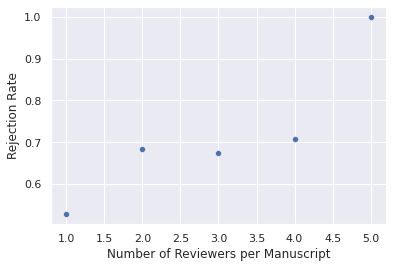

In [531]:
finial_df = regect_rates()
#compaires the number of reviews to their regection rates
ax = sns.scatterplot(data=finial_df, x="NumberReviewers", y="RejectionRate")
ax.set_xlabel('Number of Reviewers per Manuscript')
ax.set_ylabel('Rejection Rate');


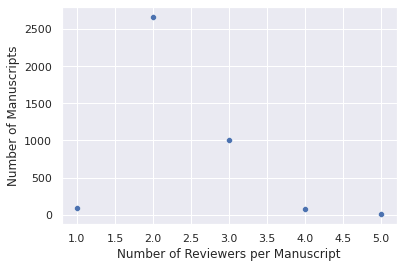

In [533]:
#looks at how many reviewers typicially look at one manuscript
ax = sns.scatterplot(data=finial_df, x="NumberReviewers", y="NumberManuscripts")
ax.set_xlabel('Number of Reviewers per Manuscript')
ax.set_ylabel('Number of Manuscripts');

In my first graph there apears to be a strong positive corrolation between the regection rate and the numbrer of reviews to review the manuscript (with the exeption of some outliers). 

Although, it appears that regection rates of 1, 16, 17, and 18 reviewers, go against this trend. However, based on my secong graph we can see that very few manuscripts were reviewed by 1, 16, 17, or 18 reviewers. Therefore, these regection rates are not based on a large enough sample size to cary much weight.  

Bellow, I have made another graph of the number of reviews vs number of manuscripts, but only included the data points with a sufficient sample size of, let's say 30 submissions. Here, we can see that in reality there is only a small positive relationship between the number of reviewers and the number of manuscripts.

(1.5, 13.5)

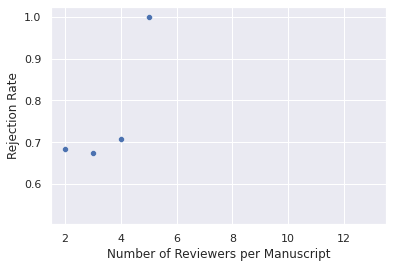

In [534]:

ax = sns.scatterplot(data=finial_df, x="NumberReviewers", y="RejectionRate")
ax.set_xlabel('Number of Reviewers per Manuscript')
ax.set_ylabel('Rejection Rate');

ax.set_xlim(1.5,13.5)

# Problem 3. Recreating a plot (15 points)

Adapted from Exercise 9.8.1 from 'Computing Skills for Biologists' text.

Martin (2015) studied songbirds in temperate and tropical environments. He
showed [in this figure](https://github.com/CSB-book/CSB/blob/master/data_wrangling/data/Martin2015_figure2.pdf) (panel A) that peak growth rate is higher in species suffering higher nest predation risk, and is lower in tropical species with the same level of risk as temperate species. In that same figure (panel B) he reported that nestling period covaries with growth rate, with tropical species having shorter nestling periods (for the same growth rate) than temperate species.

Regretably, the column names in the data file are are hard to interpret, but I was able to track down the following descriptions for each of the comlumns:

- Species – Genus_species 
- nstldpr – daily nest predation rate during the nestling period 
- nstl – length of the nestling period (hatch to fledge in d) 
- krate – traditional estimate of peak growth rate (Ki) for mass 
- kwing – traditional estimate of peak growth rate (Ki) for wings
- PropWCfldg – Proportion of adult size for wing chord length at fledging  
- Propmassfldg – Proportion of adult mass for nestling mass at fledging 
- trips – total number of feeding trips/hr 
- tripsnstl – number of feeding trips/hr/nestling 
- cs – clutch size (number of eggs) amort – arcsin-transformed annual adult mortality probability 
- lmas – log-transformed body mass 
- aerial – aerial foragers = 1, others = 0 
- regurg – parents that feed by regurgitation = 1, others = 0 
- site – field site of data collection; 1 = Arizona, 2 = Venezuela, 3 = Malaysia

Using this data (loaded in below) and the information above, recreate the plots in the figure. Note, these plots were made in a different programming language, so don't worry about making it look *exactly* the same. In fact, use this opportunity to make your own decisions about how to represent the data. For now, don't worry about computing or displying the trendlines -- we will learn how to do that later!


In [ ]:
path = 'https://raw.githubusercontent.com/CSB-book/CSB/master/data_wrangling/data/Martin2015_data.csv'
df = pd.read_csv(path, delimiter="\t")
df.head()

## Problem 4. Making your own plots (30 points)

Adapted from Exercise 9.8.2 from 'Computing Skills for Biologists' text.

Bolstad et al. (2015) studied the allometric relationships between wing length
of Drosophilidae and the length of the L2 vein that runs across the wing.
They measured more than 20,000 individuals, belonging to 111 species.

A. Produce a scatter plot for how the log of wing size relates to the log of L2 length. (The values in the table are already the logged values, but they are not labeled as such). Color the data points by the sex of the files. 

B. From your plot, what do you conclude about the relationship between wing size and L2 vein length? Are there any noticeable difference between male and female flies?

C. Add two columns to the data frame, where you will store the linear values of wing size and L2 length. Specifically, used `np.exp()` to exponentiate the values from the original columns. 

D. Reproduce your plot from part B, this time with these linearized values.

E. What do you think was the value of plotting the log values instead?

F. From your exploration so far, is there a trait you think varies between male and female flies? Make a plot to compare a trait of interest as it depends on the `Sex` category of the data frame and comment on what you conclude. Explain why you chose the plot type that you did. (Hint: No bar graphs!)

In [ ]:
path = "https://raw.githubusercontent.com/CSB-book/CSB/master/data_wrangling/data/Bolstad2015_data.csv"
df = pd.read_csv(path)
df.head()

# How long did this take? 

With a new course and new assignments, I want to be conscientious with how much time this course takes. Please let me know how long this took, so I can adjust future homeworks if needed.

# References

If you referenced any external sources for completing this homework, please list them below. (Just the links are fine.)

# Submitting your homework

Please make sure to state what each group member contribute and have each group member "sign off" that they agree they are satisfied with the final submission of this homework.

You will submit this homework via GitHub. Unless you have an approved extension or opt to submit the homework late (with a 10% deduction per day), your homework will be graded based on what is submitted on GitHub at the time of the deadline. So don't forget to push! 